### Import Libraries dan Data

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.metrics import davies_bouldin_score, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
plt.style.use("fivethirtyeight")

In [22]:
data = pd.read_csv('C:/Users/azkaw/OneDrive/Documents/College/Praktikum IPSD/Modul 6/Dataset-Tugas.csv')
data

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Exploratory Data Analysis

In [23]:
data.shape

(150, 5)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [25]:
data.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [27]:
data['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [28]:
data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [29]:
data.drop(columns='class', inplace=True)

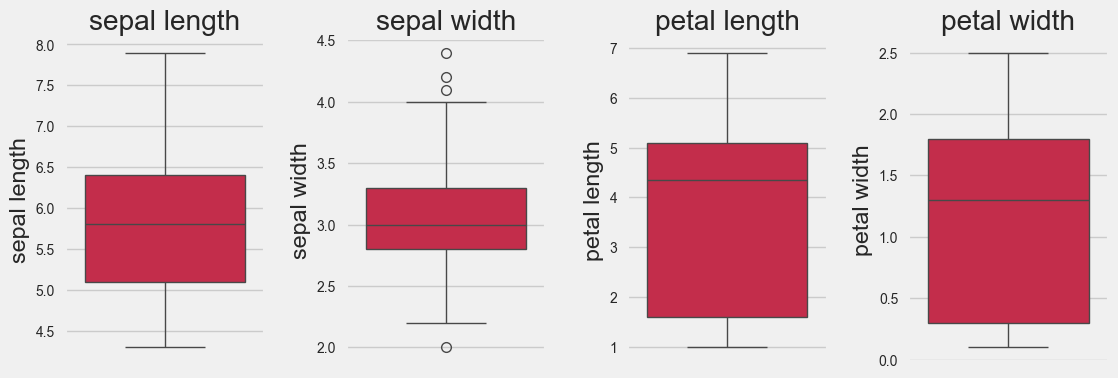

In [30]:
def box_plot(data):
    variables = data.select_dtypes(exclude='object').columns

    fig, axes =plt.subplots(1, 4, figsize=(12, 4))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for i, var in enumerate(variables):
        sns.boxplot(y=var, data=data, color="crimson", ax=axes[i])
        axes[i].set_title(var)
    plt.show()

box_plot(data)

Dapat dilihat bahwa sepal length memiliki median sekitar 5.8 dengan rentang data dari 4.5 hingga 7.9. Sepal width memiliki median sekitar 3.0 dengan rentang data dari 2.0 hingga 4.0, serta beberapa outlier di atas 4.0. Petal length memiliki median sekitar 4.3 dengan rentang data dari 1.0 hingga 6.9.Petal width memiliki median sekitar 1.3 dengan rentang data dari 0.1 hingga 2.5. Box plot ini memberikan gambaran visual tentang kecenderungan sentral, variabilitas, dan potensi outlier dalam dataset untuk setiap variabel.

### Pre-processing

In [31]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data)
X_scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

### Modelling

#### 1. K-Means

#### Metode Elbow

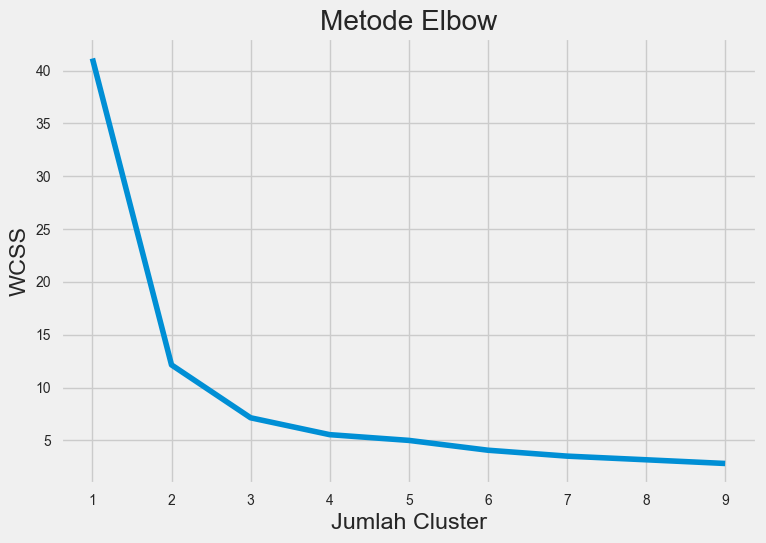

In [32]:
wcss = []
for i in range (1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range (1, 10), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

Dapat dilihat bahwa nilai Within-Cluster Sum of Squares (WCSS) menurun tajam saat jumlah klaster meningkat dari 1 hingga 3. Setelah itu, penurunan WCSS menjadi lebih lambat, membentuk bentuk "siku" atau "elbow". Titik di mana penurunan WCSS mulai melambat, yaitu sekitar 3 klaster, menunjukkan jumlah klaster yang optimal. Ini berarti bahwa menambahkan lebih banyak klaster setelah titik ini tidak memberikan pengurangan signifikan dalam WCSS, sehingga 3 klaster adalah pilihan yang efisien untuk model K-Means ini.

In [36]:
km2 = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_pred_km2 = km2.fit_predict(X_scaled)

#### Visualisasi

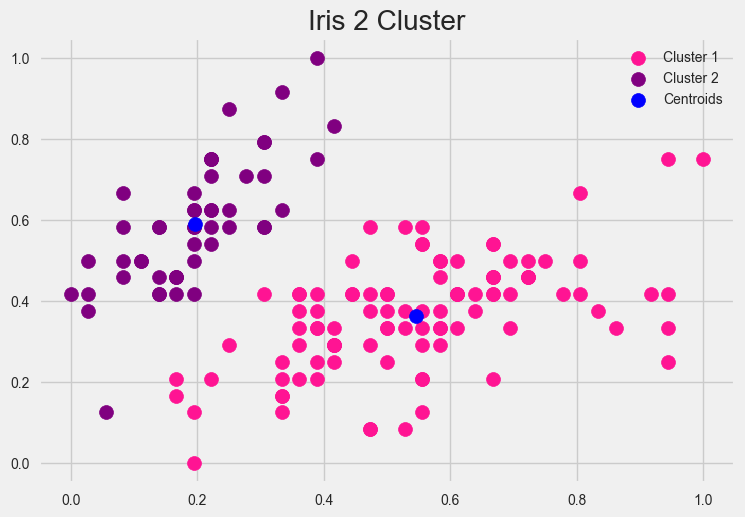

In [51]:

plt.scatter(X_scaled[y_pred_km2 == 0, 0], X_scaled[y_pred_km2 == 0, 1], s = 100, c = 'deeppink', label = 'Cluster 1')
plt.scatter(X_scaled[y_pred_km2 == 1, 0], X_scaled[y_pred_km2 == 1, 1], s = 100, c = 'purple', label = 'Cluster 2')

plt.scatter(km2.cluster_centers_[:, 0], km2.cluster_centers_[:, 1], s = 100, c = 'blue', label = 'Centroids')

plt.title('Iris 2 Cluster')
plt.legend()
plt.show()

Ada dua kelompok atau klaster yang terbentuk pada dataset ini. Kelompok pertama ditandai dengan titik-titik berwarna pink dan diberi label "Cluster 1", sementara kelompok kedua ditunjukkan dengan titik-titik berwarna ungu dan diberi label "Cluster 2". Titik-titik biru menunjukkan pusat klaster (centroids) dari kedua klaster tersebut. Plot ini menunjukkan pemisahan yang jelas antara dua klaster dalam dataset Iris, dengan masing-masing klaster memiliki pusat yang berbeda.

In [53]:
data['Label_K-Means2'] = km2.labels_
data.head()

,sepal length,sepal width,petal length,petal width,Label_K-Means2
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [54]:
data['Label_K-Means2'].value_counts()

Label_K-Means2
0    100
1     50
Name: count, dtype: int64

In [56]:
km = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_pred_km = km.fit_predict(X_scaled)

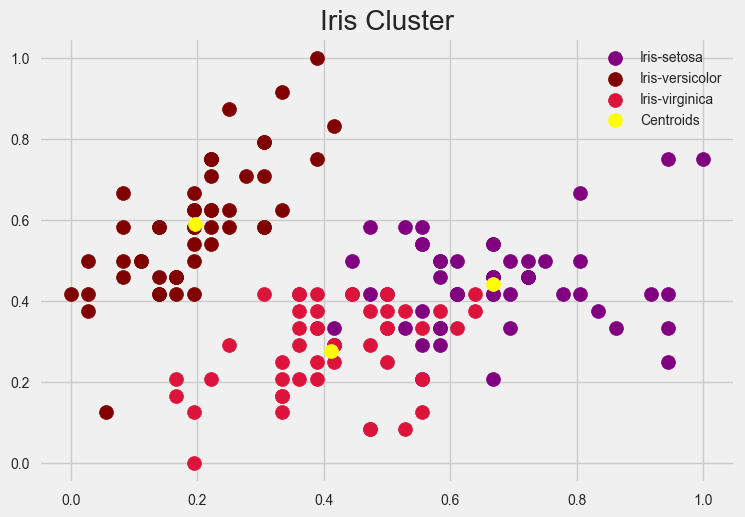

In [59]:
plt.scatter(X_scaled[y_pred_km == 0, 0], X_scaled[y_pred_km == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X_scaled[y_pred_km == 1, 0], X_scaled[y_pred_km == 1, 1], s = 100, c = 'maroon', label = 'Iris-versicolor')
plt.scatter(X_scaled[y_pred_km == 2, 0], X_scaled[y_pred_km == 2, 1], s = 100, c = 'crimson', label = 'Iris-virginica')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')

plt.title('Iris Cluster')
plt.legend()
plt.show()

Ada tiga kelompok atau klaster yang terbentuk. Setiap titik pada plot mewakili data individu, dengan warna yang berbeda menunjukkan klaster yang dihasilkan oleh analisis K-Means (Label_K-Means). Palet warna 'Set2' digunakan untuk membedakan klaster-klaster tersebut. Sumbu x mewakili sepal length dan sumbu y mewakili petal length. Plot ini menunjukkan pemisahan yang jelas antara klaster-klaster, mengindikasikan adanya pengelompokan yang berbeda dalam data berdasarkan dua fitur tersebut.

In [60]:
data['Label_K-Means'] = km.labels_
data.head()

,sepal length,sepal width,petal length,petal width,Label_K-Means2,Label_K-Means
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,1,1
2,4.7,3.2,1.3,0.2,1,1
3,4.6,3.1,1.5,0.2,1,1
4,5.0,3.6,1.4,0.2,1,1


In [61]:
data['Label_K-Means'].value_counts()

Label_K-Means
0    52
1    50
2    48
Name: count, dtype: int64

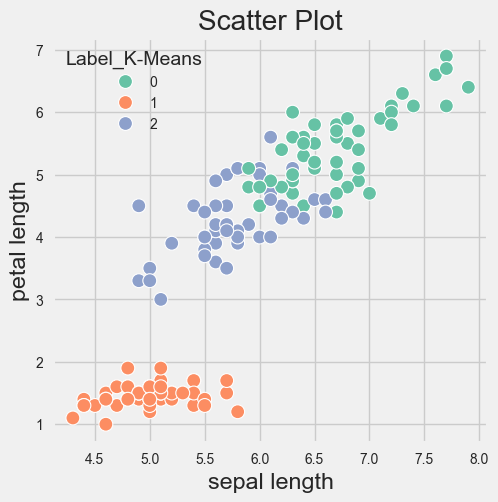

In [62]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x = 'sepal length', y = 'petal length', hue = 'Label_K-Means', data = data, palette = 'Set2', s=100);
plt.title("Scatter Plot")
plt.show()

Dataset terbagi menjadi tiga kelompok utama berdasarkan panjang sepal dan panjang petal. Setiap kelompok menunjukkan pola distribusi yang berbeda, yang mengindikasikan adanya variasi dalam karakteristik morfologi bunga.

#### 2. DBSCAN

In [63]:
db = DBSCAN(eps = 0.4, min_samples = 5)

db.fit(X_scaled)

y_pred_db = db.labels_
y_pred_db

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [65]:
data['Label_DB-Scan'] = db.labels_
data.head()

,sepal length,sepal width,petal length,petal width,Label_K-Means2,Label_K-Means,Hasil_cluster,Label_DB-Scan
0,5.1,3.5,1.4,0.2,1,1,0,0
1,4.9,3.0,1.4,0.2,1,1,0,0
2,4.7,3.2,1.3,0.2,1,1,0,0
3,4.6,3.1,1.5,0.2,1,1,0,0
4,5.0,3.6,1.4,0.2,1,1,0,0


In [67]:
data['Label_DB-Scan'].value_counts()

Label_DB-Scan
1    100
0     50
Name: count, dtype: int64

Terdapat dua klaster yang dihasilkan oleh algoritma DB-Scan. Klaster pertama (Label 1) memiliki 100 data poin, sedangkan klaster kedua (Label 0) memiliki 50 data poin. Ada dua kelompok utama yang teridentifikasi oleh algoritma DB-Scan dengan klaster pertama memiliki jumlah data poin yang lebih banyak dibandingkan klaster kedua.

#### Visulaisasi

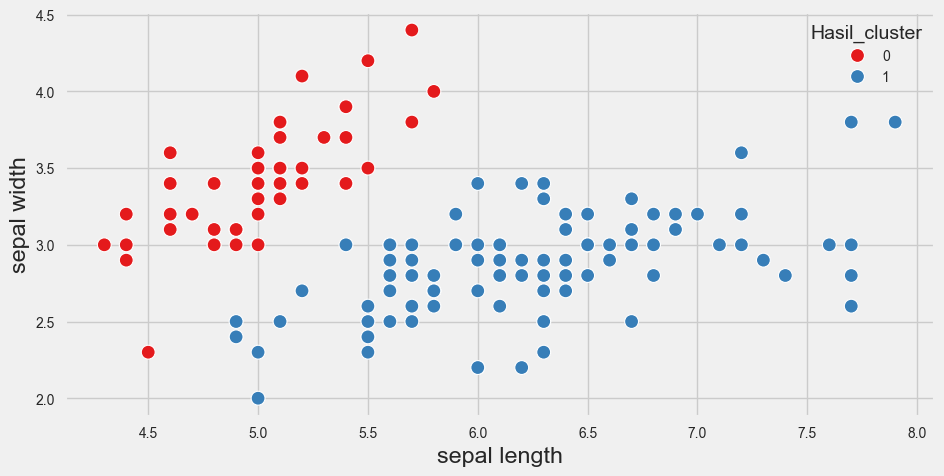

In [ ]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x = 'sepal length', y = 'sepal width',
               hue = 'Hasil_cluster', data = data, palette = 'Set1', s = 100);

Setiap titik pada plot mewakili data individu, dengan warna yang berbeda menunjukkan klaster yang dihasilkan oleh analisis klasterisasi (Hasil_cluster). Kelompok pertama ditandai dengan warna merah, sementara kelompok kedua ditandai dengan warna biru. Palet warna 'Set1' digunakan untuk membedakan klaster-klaster tersebut. Visualisasi ini membantu mengidentifikasi pola atau kelompok dalam data berdasarkan karakteristik morfologi bunga yang diklasterkan.

### Matriks Evaluasi

#### 1. K-Means

In [70]:
e_km2 = silhouette_score(X_scaled, y_pred_km2)
dbi_km2 = davies_bouldin_score(X_scaled, y_pred_km2)

print('Silhouette Score K-Means 2 Cluster:', e_km2)
print('Davies-Bouldin Index K-Means 2 Cluster:', dbi_km2)

Silhouette Score K-Means 2 Cluster: 0.6294675561906644
Davies-Bouldin Index K-Means 2 Cluster: 0.48770481288357487


K-Means dengan 2 cluster dan DBSCAN memiliki Silhouette Score yang sama yaitu 0.629, yang menunjukkan pemisahan cluster yang baik. Namun, K-Means 2 cluster lebih unggul dibanding Davies-Bouldin Index yang lebih rendah yaitu 0.4877, menandakan pemisahan yang lebih jelas dibandingkan dengan K-Means 3 cluster (0.7875). DBSCAN juga menghasilkan clustering yang baik tanpa perlu menentukan jumlah cluster, sementara K-Means 3 cluster cenderung lebih tumpang tindih dengan skor lebih rendah (0.482).

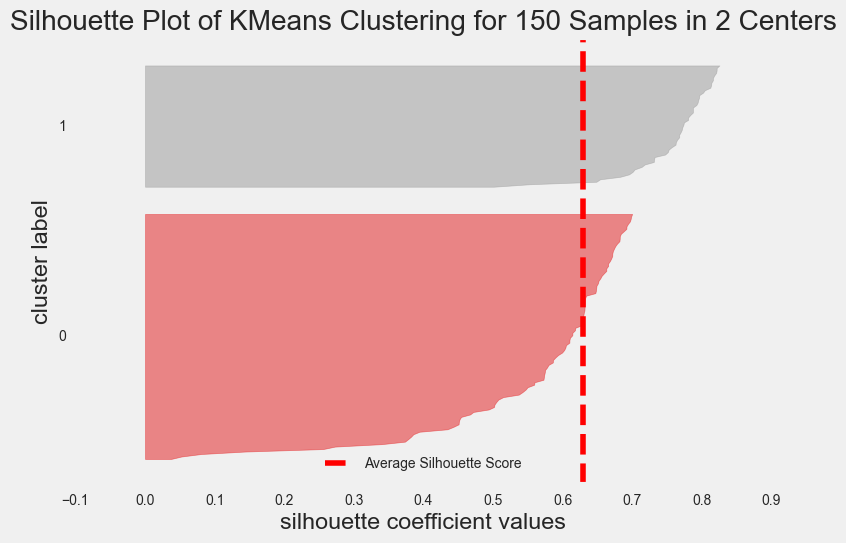

In [71]:
silhouette_viz = SilhouetteVisualizer(km2)
silhouette_viz.fit(X_scaled)
plt.grid(False)
silhouette_viz.show()
plt.show()

Hasil Silhouette Plot untuk K-Means dengan 2 cluster menunjukkan bahwa rata-rata silhouette score sekitar 0.6. Cluster abu-abu stabil dan cluster merah cukup tersebar, namun tetap di atas rata-rata. Tidak ada data dengan nilai negatif, yang menandakan tidak ada salah cluster. Clustering ini lebih optimal dengan kelompok yang lebih terpisah dan kompak.

In [74]:
e_km = silhouette_score(X_scaled, y_pred_km)
dbi_km = davies_bouldin_score(X_scaled, y_pred_km)

print('Silhouette Score K-Means 3 Cluster:', e_km)
print('Davies-Bouldin Index K-Means 3 Cluster 3:', dbi_km)

Silhouette Score K-Means 3 Cluster: 0.48247222154221125
Davies-Bouldin Index K-Means 3 Cluster 3: 0.7874978912757878


Hasil evaluasi menunjukkan bahwa Silhouette Score untuk clustering dengan K-Means (3 cluster) adalah 0.482, yang berada di atas 0 tetapi mendekati 0.5. Ini mengindikasikan clustering cukup baik, namun ada beberapa data yang mungkin berada di batas antar cluster. Sedangkan nilai Davies-Bouldin Index cukup kecil yaitu 0.787, menandakan bahwa cluster memiliki pemisahan yang baik.

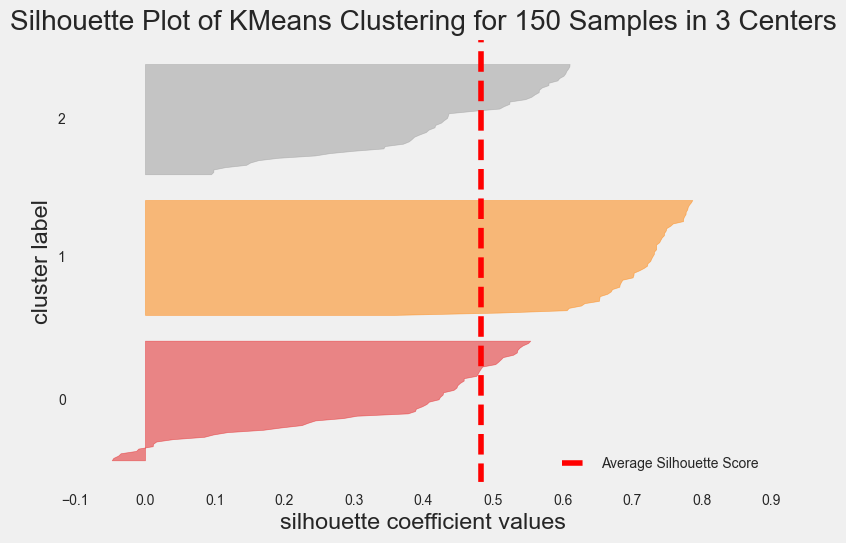

In [75]:
silhouette_viz = SilhouetteVisualizer(km)
silhouette_viz.fit(X_scaled)
plt.grid(False)
silhouette_viz.show()
plt.show()

Hasil visualisasi Silhouette Plot di atas menunjukkan bahwa rata-rata nilai silhouette score berada di sekitar 0.5, yang menandakan hasil clustering cukup baik. Meskipun clustering ini cukup baik, ada beberapa outliers atau data dengan nilai negatif menunjukkan perlunya pengecekan lebih lanjut terhadap parameter clustering atau karakteristik data.

#### 2. Davies-Bouldin Index (DBI)

In [76]:
e_db = silhouette_score(X_scaled, y_pred_db)
dbi_db = davies_bouldin_score(X_scaled, y_pred_db)

print('Silhouette Score DBSCAN:', e_db)
print('Davies-Bouldin Index DBSCAN:', dbi_db)

Silhouette Score DBSCAN: 0.6294675561906644
Davies-Bouldin Index DBSCAN: 0.48770481288357487


Pada Silhouette Score, metrik ini mengukur seberapa baik objek-objek dalam satu cluster dikelompokkan. Semakin mendekati angka 1, maka semakin baik clusteringnya. Sedangkan pada Davies-Bouldin Index, semakin kecil angkanya, maka semakin baik hasil clusteringnya. Metrik ini melihat seberapa besar jarak antar cluster dibandingkan dengan lebar cluster.